In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np 
import cv2
import os
import random
import matplotlib.pyplot as plt 
import pickle
from multiprocessing import Pool, Manager, cpu_count, Lock
import pickle
import keras 
from keras import models
from keras.models import Sequential
from keras.layers import Conv2D,MaxPool2D,Flatten,Dense,Activation,Dropout
import keras.losses
import time
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import concatenate
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
import tensorflow as tf

In [ ]:
from keras_preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator = train_datagen.flow_from_directory(directory="/content/drive/MyDrive/Miczone/fingerprint/data/train",target_size=(224,224),batch_size=32)

Found 25331 images belonging to 7 classes.


In [ ]:
val_generator = val_datagen.flow_from_directory(directory="/content/drive/MyDrive/Miczone/fingerprint/data/val",target_size=(224,224),batch_size=32)

Found 5844 images belonging to 7 classes.


In [ ]:
for data_batch,label_batch in train_generator:
  print(data_batch.shape)
  print(label_batch.shape)
  break

(32, 224, 224, 3)
(32, 7)


In [ ]:
model = Sequential()
width = 224
height = 224
classes = 7

In [ ]:
shape = (width, height, 3)

In [ ]:
model.add(Conv2D(16, (3, 3), padding="same", input_shape=shape))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Conv2D(16, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Conv2D(32, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Conv2D(128, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(2048))
model.add(Activation("relu"))
model.add(Dropout(0.2))
model.add(Dense(1024))
model.add(Activation("relu"))
model.add(Dropout(0.2))
model.add(Dense(128))
model.add(Activation("relu"))
model.add(Dropout(0.2))
model.add(Dense(classes))
model.add(Activation("softmax"))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 16)      448       
_________________________________________________________________
activation (Activation)      (None, 224, 224, 16)      0         
_________________________________________________________________
batch_normalization (BatchNo (None, 224, 224, 16)      64        
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 224, 224, 16)      2320      
_________________________________________________________________
activation_1 (Activation)    (None, 224, 224, 16)      0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 224, 224, 16)      64        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 16)      0

In [ ]:
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(), optimizer=tf.keras.optimizers.Adam(lr=1e-4),
              metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
 history = model .fit(train_generator,epochs=15, validation_data =val_generator,batch_size=32,verbose = 1)

Epoch 1/15
792/792 [==============================] - 8652s 11s/step - loss: 1.5764 - accuracy: 0.4285 - val_loss: 1.9127 - val_accuracy: 0.3224
Epoch 2/15
792/792 [==============================] - 133s 168ms/step - loss: 1.1026 - accuracy: 0.5979 - val_loss: 0.9768 - val_accuracy: 0.6482
Epoch 3/15
792/792 [==============================] - 132s 166ms/step - loss: 0.8758 - accuracy: 0.6689 - val_loss: 0.7680 - val_accuracy: 0.7091
Epoch 4/15
792/792 [==============================] - 130s 164ms/step - loss: 0.7783 - accuracy: 0.7028 - val_loss: 0.7455 - val_accuracy: 0.7250
Epoch 5/15
792/792 [==============================] - 131s 165ms/step - loss: 0.7124 - accuracy: 0.7231 - val_loss: 0.6888 - val_accuracy: 0.7373
Epoch 6/15
792/792 [==============================] - 131s 165ms/step - loss: 0.6563 - accuracy: 0.7458 - val_loss: 0.6706 - val_accuracy: 0.7464
Epoch 7/15
792/792 [==============================] - 130s 164ms/step - loss: 0.6048 - accuracy: 0.7648 - val_loss: 0.6264 - 

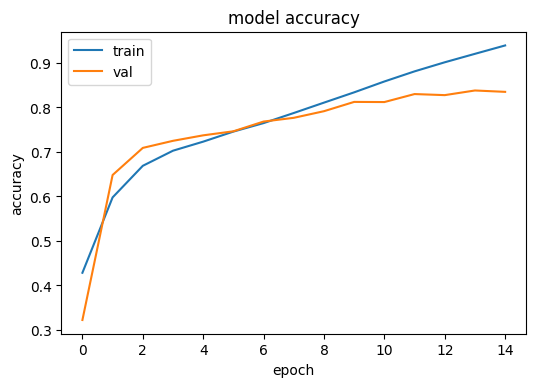

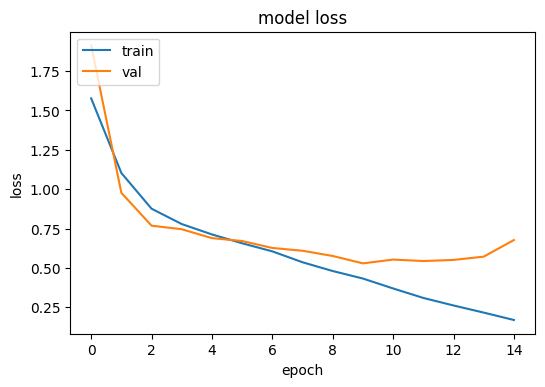

In [ ]:
plt.figure(figsize = (6,4),dpi=100)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# summarize history for loss
plt.figure(figsize = (6,4),dpi=100)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
test_generator = test_datagen.flow_from_directory(directory="/content/drive/MyDrive/Miczone/fingerprint/data/test",target_size=(224,224),batch_size=7795,class_mode="sparse")

Found 7795 images belonging to 7 classes.


In [ ]:
for X_test,Y_test in test_generator:
  print(X_test.shape)
  print(Y_test.shape)
  break

(7795, 224, 224, 3)
(7795,)


In [ ]:
pred = model.predict(X_test)
pred_idx = np.argmax(pred, axis=1)

In [ ]:
print(classification_report(Y_test, pred_idx))

              precision    recall  f1-score   support

         0.0       0.94      0.96      0.95       695
         1.0       0.96      0.70      0.81       129
         2.0       0.95      0.97      0.96      3582
         3.0       0.73      0.64      0.69      1297
         4.0       0.69      0.69      0.69      1316
         5.0       0.78      0.47      0.59        76
         6.0       0.56      0.66      0.61       700

    accuracy                           0.83      7795
   macro avg       0.80      0.73      0.76      7795
weighted avg       0.83      0.83      0.83      7795



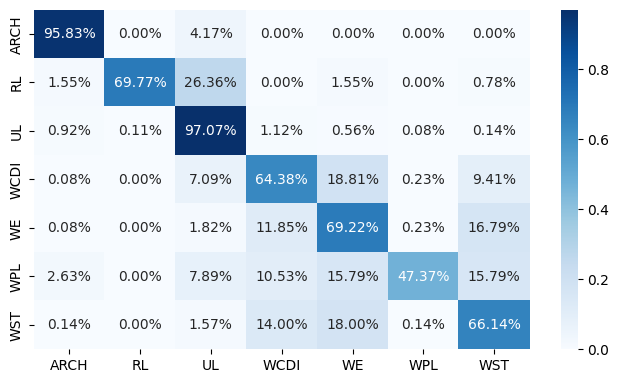

In [ ]:
import pandas as pd
import seaborn as sns
cm = confusion_matrix(Y_test,pred_idx)
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
df_cm = pd.DataFrame(cmn, index=['ARCH', 'RL','UL','WCDI','WE',"WPL","WST"], columns=['ARCH', 'RL','UL','WCDI','WE',"WPL","WST"])
plt.figure(figsize = (8,4.5),dpi=100)
sns.heatmap(df_cm, cmap="Blues", annot=True,fmt='.2%')
plt.show()